In [ ]:
#This Model to pridect diabetes using Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
pip install pyforest


Note: you may need to restart the kernel to use updated packages.


In [8]:
from pyforest import*
lazy_imports()

['import plotly.express as px',
 'import spacy',
 'import imutils',
 'import pydot',
 'from sklearn.preprocessing import MinMaxScaler',
 'import pandas as pd',
 'from sklearn import svm',
 'from sklearn.linear_model import Ridge',
 'from PIL import Image',
 'import numpy as np',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn import metrics',
 'import torch',
 'from fbprophet import Prophet',
 'import seaborn as sns',
 'import awswrangler as wr',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import plotly.graph_objs as go',
 'from sklearn.impute import SimpleImputer',
 'import pickle',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.linear_model import RidgeCV',
 'import gensim',
 'import matplotlib as mpl',
 'import lightgbm as lgb',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.model_selecti

In [9]:
data = pd.read_csv("C:\\Users\\TECH\\Desktop\\Data Science\\Machine Learning\\pima-indians-diabetes.csv")
data

<IPython.core.display.Javascript object>

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
data.shape

(768, 9)

In [11]:
data.isnull().values.any()

False

In [12]:
data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

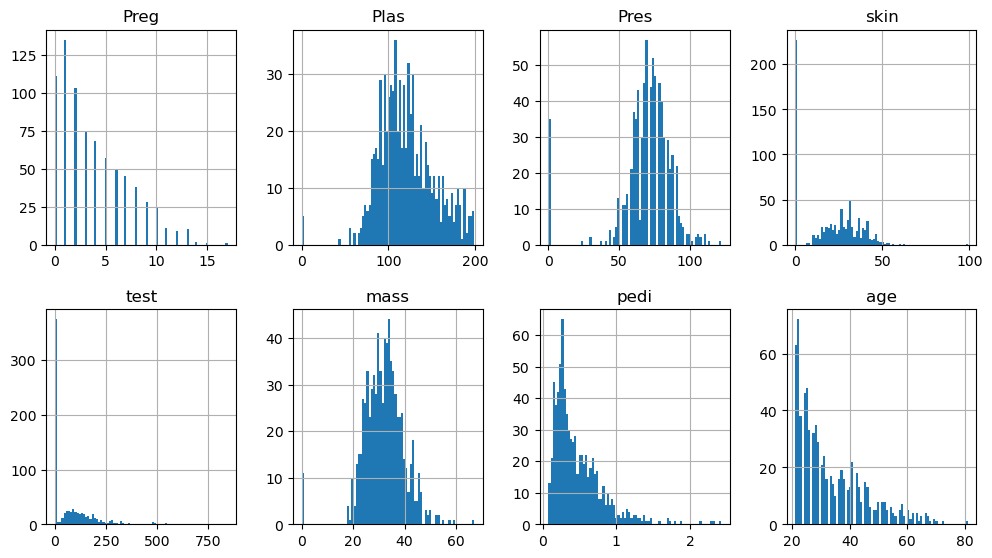

In [13]:
columns = list(data)[0:-1]
data[columns].hist(bins = 80, figsize=(12, 50), layout=(14, 4));

In [14]:
data.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

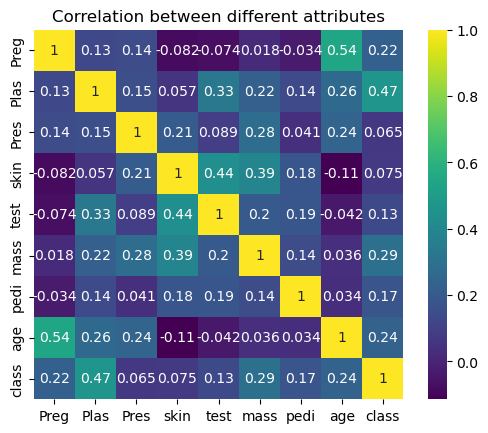

In [15]:
sns.heatmap(data.corr(), vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.title('Correlation between different attributes')
plt.show()

<IPython.core.display.Javascript object>

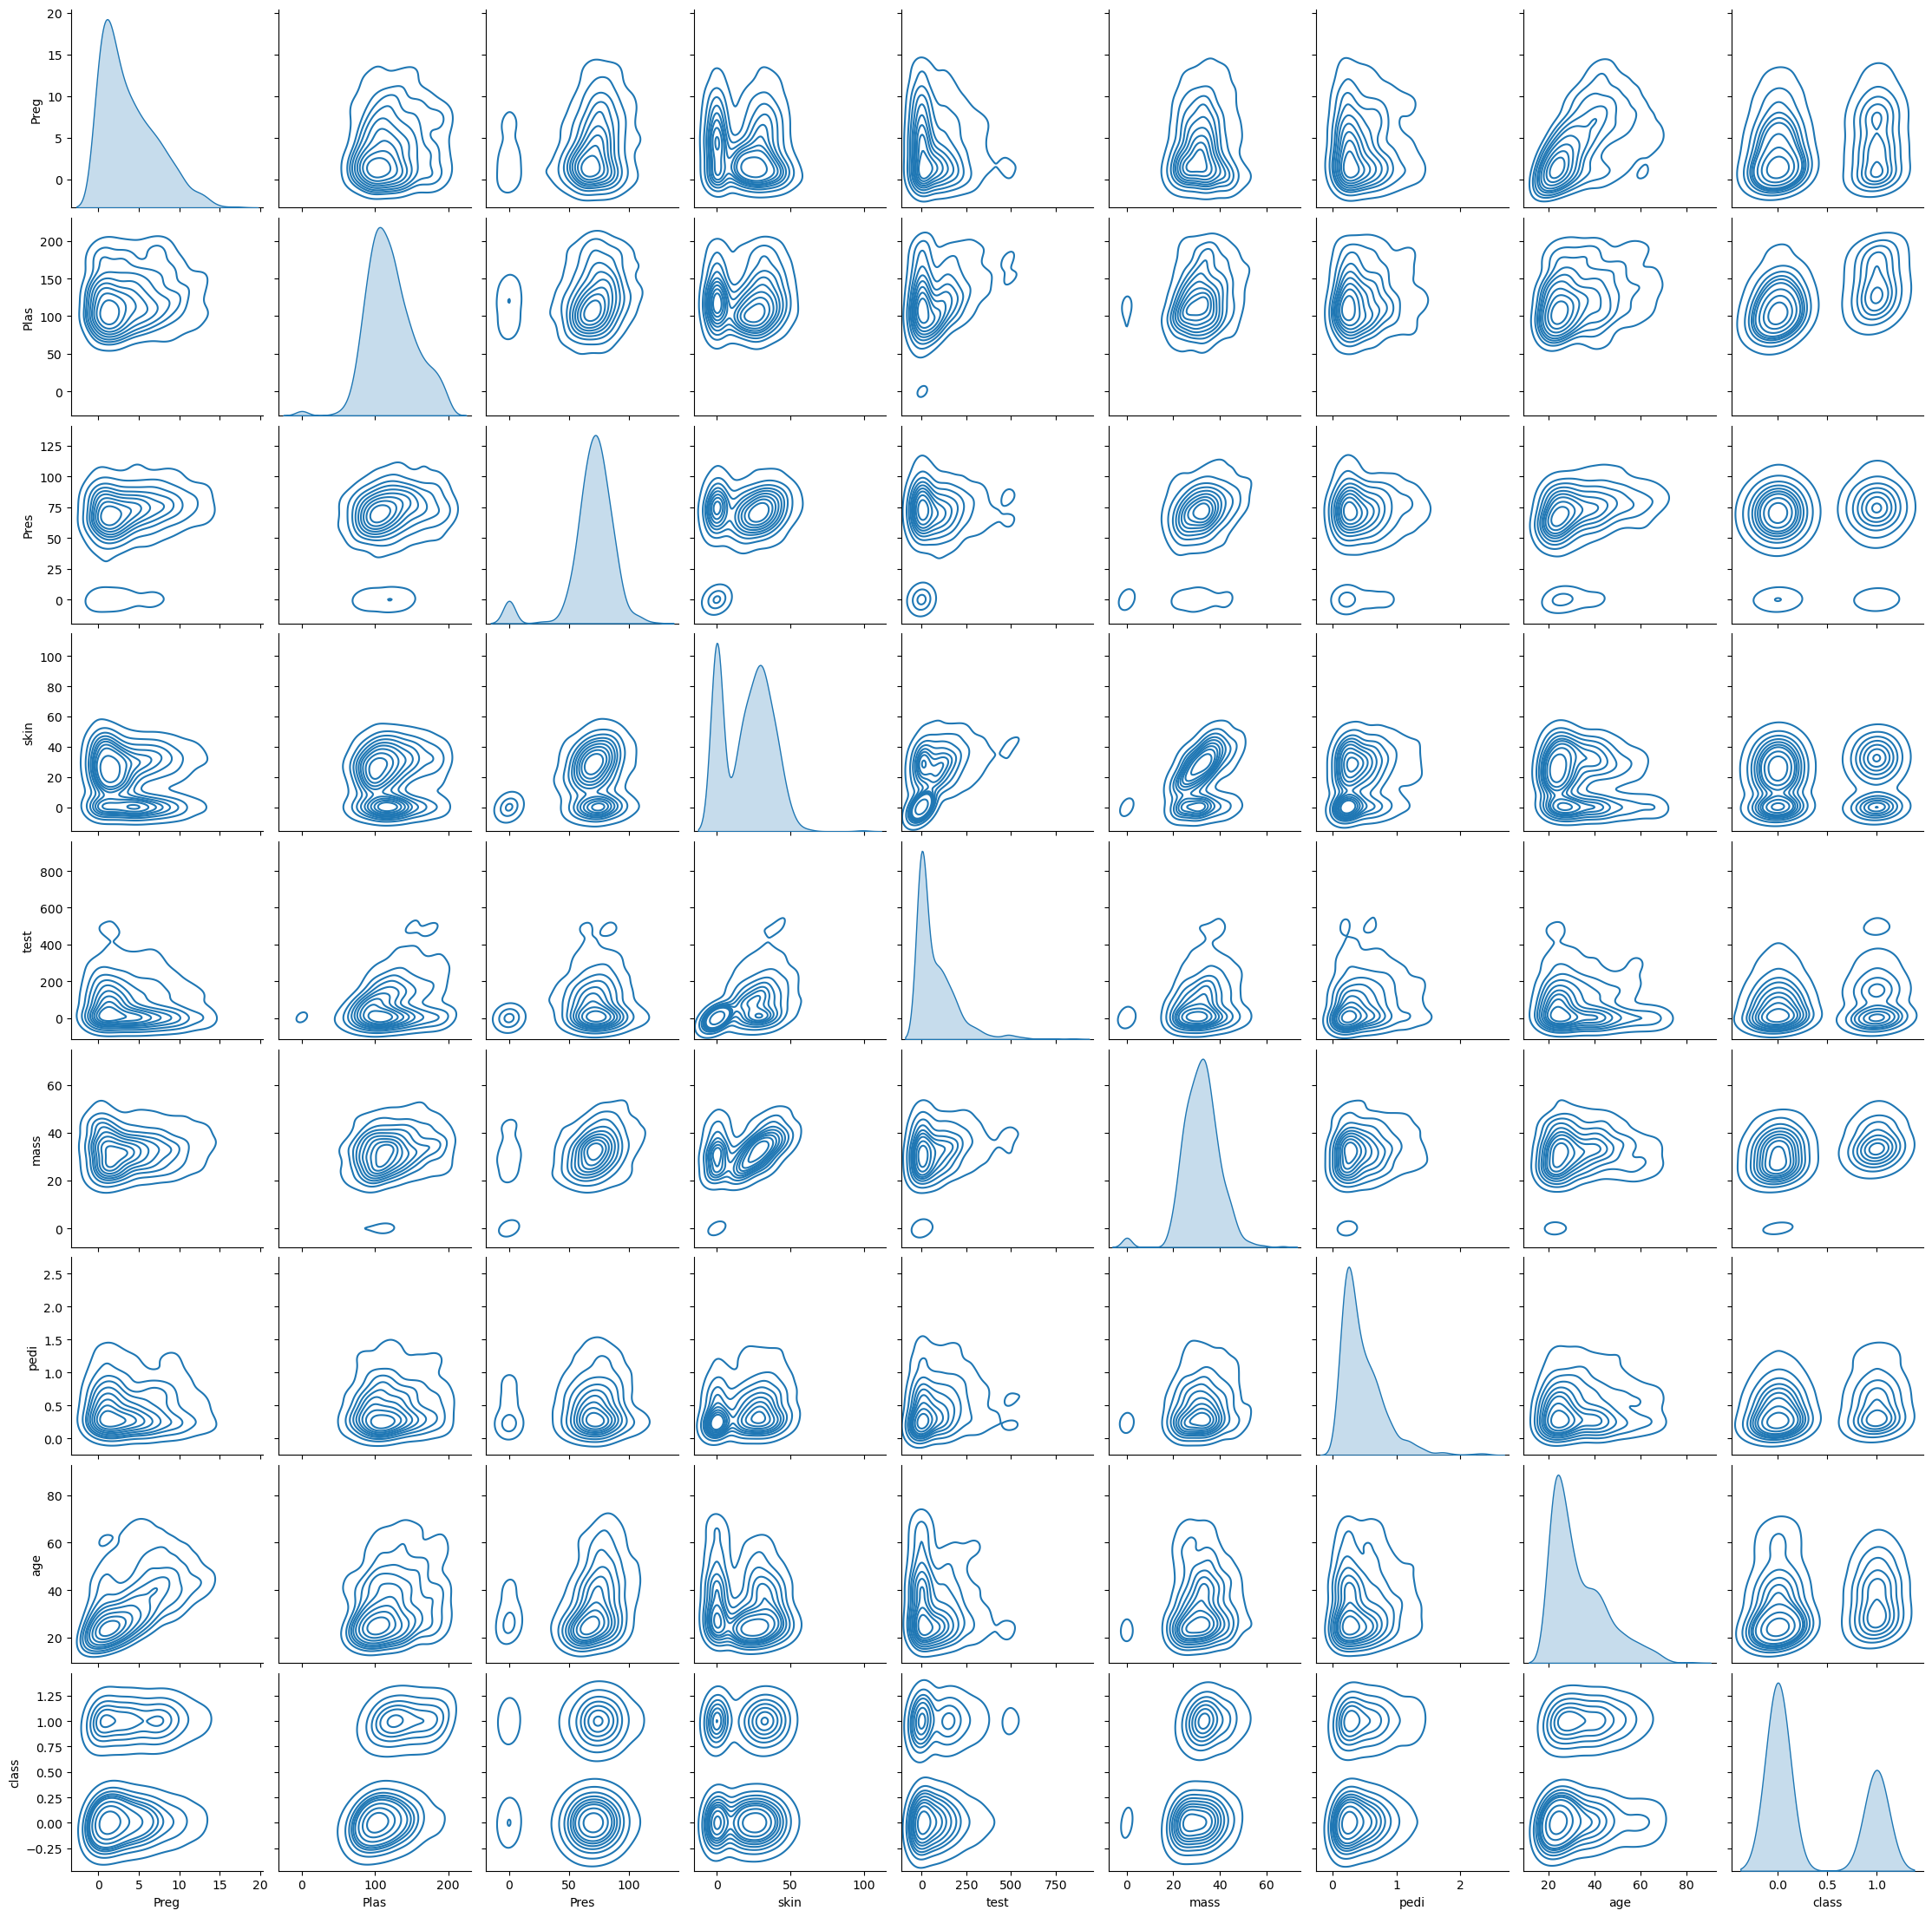

In [16]:
sns.pairplot(data, kind = 'kde')


In [17]:
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [18]:
X = data.drop(['class'], axis = 1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)

<IPython.core.display.Javascript object>

In [19]:
X_train

,Preg,Plas,Pres,skin,test,mass,pedi,age
46,1,146,56,0,0,29.7,0.564,29
308,0,128,68,19,180,30.5,1.391,25
735,4,95,60,32,0,35.4,0.284,28
449,0,120,74,18,63,30.5,0.285,26
429,1,95,82,25,180,35.0,0.233,43
...,...,...,...,...,...,...,...,...
96,2,92,62,28,0,31.6,0.130,24
571,2,130,96,0,0,22.6,0.268,21
173,1,79,60,42,48,43.5,0.678,23
753,0,181,88,44,510,43.3,0.222,26


In [20]:
print("{}% data is trained".format((len(X_train)/len(data)) *100 ))
print("{}% data is tested".format((len(X_test)/len(data)) *100 ))

69.921875% data is trained
30.078125% data is tested


In [21]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols = X_train.columns
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

X_train.head() #read about it

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,1.000000,146.0,56.0,29.303109,155.065517,29.7,0.564,29.0
1,4.339827,128.0,68.0,19.000000,180.000000,30.5,1.391,25.0
2,4.000000,95.0,60.0,32.000000,155.065517,35.4,0.284,28.0
3,4.339827,120.0,74.0,18.000000,63.000000,30.5,0.285,26.0
4,1.000000,95.0,82.0,25.000000,180.000000,35.0,0.233,43.0


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression(solver = "liblinear")

model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [29]:
X_test.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,4.861538,91.0,68.0,32.0,210.000000,39.9,0.381,25.0
1,3.000000,173.0,82.0,48.0,465.000000,38.4,2.137,25.0
2,1.000000,147.0,94.0,41.0,156.894231,49.3,0.358,27.0
3,2.000000,107.0,74.0,30.0,100.000000,33.6,0.404,23.0
4,11.000000,138.0,74.0,26.0,144.000000,36.1,0.557,50.0


In [30]:
y_predict = model.predict(X_test)
y_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [33]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7662337662337663


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

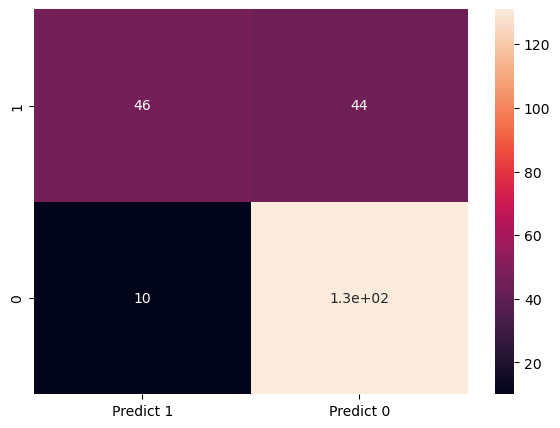

In [40]:
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1", "0"]],
columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True)